In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Latihan Bootcamp Indonesia AI Batch 5/Dataset/Fraud Detection/fraudTrain.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Latihan Bootcamp Indonesia AI Batch 5/Dataset/Fraud Detection/fraudTest.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df_train.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
trans_date_trans_time,2019-01-01 00:00:18,2019-01-01 00:00:44,2019-01-01 00:00:51,2019-01-01 00:01:16,2019-01-01 00:03:06
cc_num,2703186189652095,630423337322,38859492057661,3534093764340240,375534208663984
merchant,"fraud_Rippin, Kub and Mann","fraud_Heller, Gutmann and Zieme",fraud_Lind-Buckridge,"fraud_Kutch, Hermiston and Farrell",fraud_Keeling-Crist
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos
amt,4.97,107.23,220.11,45.0,41.96
first,Jennifer,Stephanie,Edward,Jeremy,Tyler
last,Banks,Gill,Sanchez,White,Garcia
gender,F,F,M,M,M
street,561 Perry Cove,43039 Riley Greens Suite 393,594 White Dale Suite 530,9443 Cynthia Court Apt. 038,408 Bradley Rest


In [ ]:
df_train.tail().T

,1296670,1296671,1296672,1296673,1296674
Unnamed: 0,1296670,1296671,1296672,1296673,1296674
trans_date_trans_time,2020-06-21 12:12:08,2020-06-21 12:12:19,2020-06-21 12:12:32,2020-06-21 12:13:36,2020-06-21 12:13:37
cc_num,30263540414123,6011149206456997,3514865930894695,2720012583106919,4292902571056973207
merchant,fraud_Reichel Inc,fraud_Abernathy and Sons,fraud_Stiedemann Ltd,"fraud_Reinger, Weissnat and Strosin","fraud_Langosh, Wintheiser and Hyatt"
category,entertainment,food_dining,food_dining,food_dining,food_dining
amt,15.56,51.7,105.93,74.9,4.3
first,Erik,Jeffrey,Christopher,Joseph,Jeffrey
last,Patterson,White,Castaneda,Murray,Smith
gender,M,M,M,M,M
street,162 Jessica Row Apt. 072,8617 Holmes Terrace Suite 651,1632 Cohen Drive Suite 639,42933 Ryan Underpass,135 Joseph Mountains


In [ ]:
for col in df_train.columns:
  print(col, df_train[col].nunique())

Unnamed: 0 1296675
trans_date_trans_time 1274791
cc_num 983
merchant 693
category 14
amt 52928
first 352
last 481
gender 2
street 983
city 894
state 51
zip 970
lat 968
long 969
city_pop 879
job 494
dob 968
trans_num 1296675
unix_time 1274823
merch_lat 1247805
merch_long 1275745
is_fraud 2


In [ ]:
df_train.drop(columns=['Unnamed: 0', 'merchant', 'first', 'last', 'street', 'state', 'zip', 'trans_num', 'unix_time'], axis=1, inplace=True)
df_test.drop(columns=['Unnamed: 0', 'merchant', 'first', 'last', 'street', 'state', 'zip', 'trans_num', 'unix_time'], axis=1, inplace=True)

In [ ]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['dob'] = pd.to_datetime(df_train['dob'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   city                   1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [ ]:
for col in df_train.columns:
  print(col, df_train[col].nunique())

trans_date_trans_time 1274791
cc_num 983
category 14
amt 52928
gender 2
city 894
lat 968
long 969
city_pop 879
job 494
dob 968
merch_lat 1247805
merch_long 1275745
is_fraud 2


In [ ]:
df_train.isnull().any()

trans_date_trans_time    False
cc_num                   False
category                 False
amt                      False
gender                   False
city                     False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

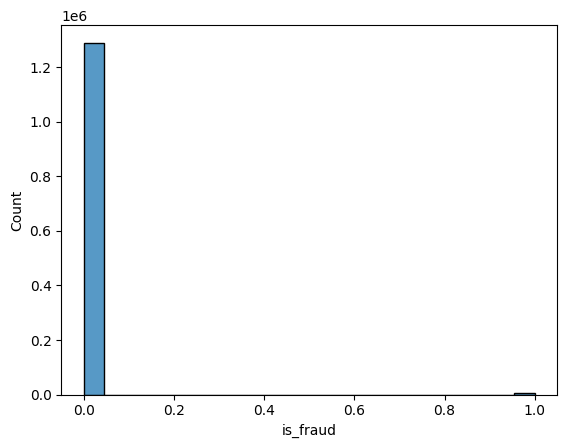

In [ ]:
sns.histplot(df_train['is_fraud'])
plt.xlabel('is_fraud')
plt.show()

In [ ]:
df_train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [ ]:
print(f"Percentage of non-fraudulent transactions: {(df_train['is_fraud'].value_counts()[0] / df_train.shape[0]) * 100}%")
print(f"Percentage of fraudulent transactions: {(df_train['is_fraud'].value_counts()[1] / df_train.shape[0]) * 100}%")

Percentage of non-fraudulent transactions: 99.42113482561166%
Percentage of fraudulent transactions: 0.5788651743883394%


# Eksplorasi Fitur trans_date_trans_time

In [ ]:
# Membuat ekstrak jam dari trans_date_trans_time dan jadikan fitur baru
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour

In [ ]:
# Menampilkan jumlah transaksi tiap jam nya
df_train['hour'].value_counts()

hour
23    67104
22    66982
18    66051
16    65726
21    65533
19    65508
17    65450
15    65391
13    65314
12    65257
20    65098
14    64885
1     42869
3     42769
2     42656
8     42505
0     42502
6     42300
10    42271
7     42203
9     42185
5     42171
11    42082
4     41863
Name: count, dtype: int64

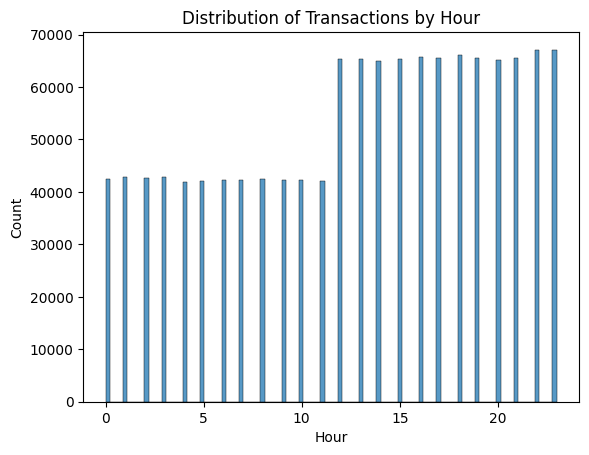

In [ ]:
# Visualisasi distribusi transaksi berdasarkan jamnya
sns.histplot(df_train['hour'])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Hour')
plt.show()

Transaksi banyak terjadi pada jam **12.00 - 23.00**. Pada jam tersebut, transaksi konstan berkisar di **64000-68000**.

Pada jam **00.00 - 11.00**, transaksi konstan berkisar di **41000-43000**.

In [ ]:
# Filter data transaksi fraud
fraud_transactions = df_train[df_train['is_fraud'] == 1]

# Ekstrak jam dari kolom trans_date_trans_time untuk transaksi fraud
fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour

# Hitung jumlah transaksi fraud untuk setiap jam
fraud_by_hour = fraud_transactions['hour'].value_counts().sort_index()

<ipython-input-18-e99863a336b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour


In [ ]:
fraud_by_hour

hour
0      635
1      658
2      625
3      609
4       46
5       60
6       40
7       56
8       49
9       47
10      40
11      42
12      67
13      80
14      86
15      79
16      76
17      78
18      81
19      81
20      62
21      74
22    1931
23    1904
Name: count, dtype: int64

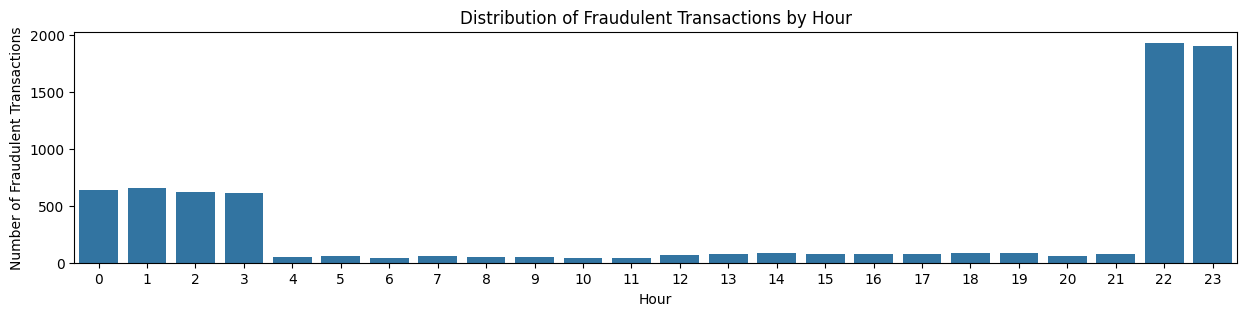

In [ ]:
# Visualisasi distribusi transaksi fraud berdasarkan jamnya
plt.figure(figsize=(15, 3))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.show()

In [ ]:
# prompt: membuat kolom baru di mana jika kolom hour bernilai 0-3, maka termasuk ke dalam 'low risk'. Jika kolom hour bernilai 4-21, maka termasuk ke dalam 'medium risk'. Dan jika kolom hour bernilai 22-23, maka termasuk ke dalam 'high risk'

def categorize_risk_of_hour(hour):
  if hour >= 0 and hour <= 3:
    return 2
  elif hour >= 4 and hour <= 21:
    return 1
  elif hour >= 22 and hour <= 23:
    return 3

df_train['risk_category_of_hour'] = df_train['hour'].apply(categorize_risk_of_hour)
df_test['risk_category_of_hour'] = df_test['hour'].apply(categorize_risk_of_hour)

In [ ]:
df_train['risk_category_of_hour'].value_counts()

risk_category_of_hour
1    991793
2    170796
3    134086
Name: count, dtype: int64

Jam dengan potensi fraud terendah terjadi pada jam **04.00 - 21.00** dengan jumlah terjadinya fraud berkisar antara **40-86** transaksi.

Jam dengan potensi fraud sedang terjadi pada jam **00.00 - 03.00** dengan jumlah terjadinya fraud berkisar antara **609-658** transaksi.

Jam dengan potensi fraud tertinggi terjadi pada jam **22.00 dan 23.00** dengan jumlah terjadinya fraud berkisar antara **1904-1931**

Pisahkan menjadi **3** kategori

In [ ]:
# Ekstrak data harian dari kolom trans_date_trans_time dan jadikan kolom baru
df_train['day_of_week'] = df_train['trans_date_trans_time'].dt.day_of_week
df_test['day_of_week'] = df_test['trans_date_trans_time'].dt.day_of_week

In [ ]:
df_train['day_of_week'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int32)

In [ ]:
df_train['day_of_week'].value_counts()

day_of_week
0    254282
6    250579
5    200957
1    160227
4    152272
3    147285
2    131073
Name: count, dtype: int64

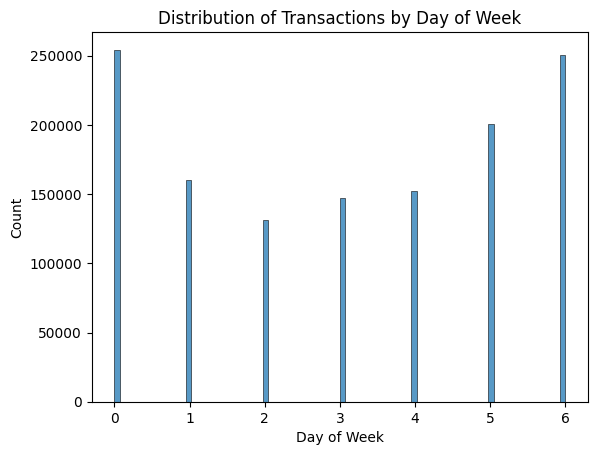

In [ ]:
# Visualisasi distribusi transaksi berdasarkan hari dalam seminggu
sns.histplot(df_train['day_of_week'])
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Day of Week')
plt.show()

Transaksi banyak terjadi di hari **Senin dan Minggu** yang berkisar antara **250 ribuan** transaksi. Sedangkan hari **Rabu** menjadi hari yang paling sedikit terjadi transaksi, yaitu sekitar **130 ribuan**.

In [ ]:
# Filter data transaksi fraud
fraud_transactions = df_train[df_train['is_fraud'] == 1]

# Ekstrak hari dalam seminggu dari kolom trans_date_trans_time untuk transaksi fraud
fraud_transactions['day_of_week'] = fraud_transactions['trans_date_trans_time'].dt.day_of_week

# Hitung jumlah transaksi fraud untuk setiap hari dalam seminggu
fraud_by_day = fraud_transactions['day_of_week'].value_counts().sort_index()

<ipython-input-27-2b542ee4107e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['day_of_week'] = fraud_transactions['trans_date_trans_time'].dt.day_of_week


In [ ]:
fraud_by_day

day_of_week
0    1182
1     935
2     859
3    1008
4    1079
5    1227
6    1216
Name: count, dtype: int64

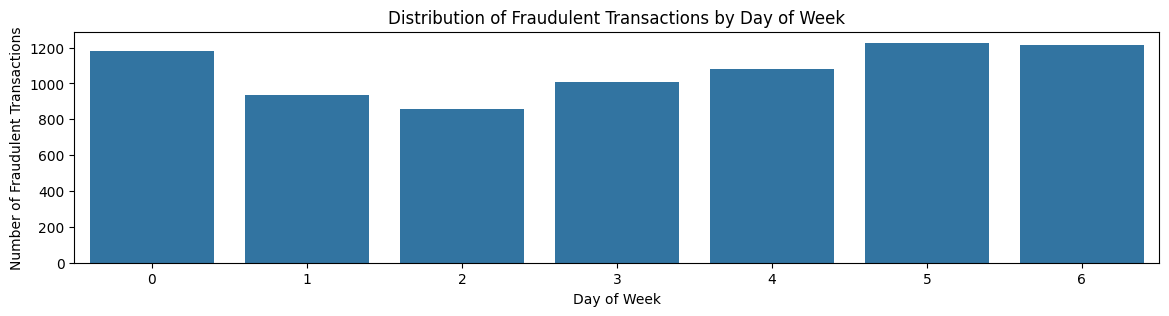

In [ ]:
# Visualisasi distribusi transaksi fraud berdasarkan hari dalam seminggu
plt.figure(figsize=(14, 3))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Day of Week')
plt.show()

In [ ]:
def cateforize_risk_by_day_of_week(day_of_week):
  if day_of_week in [1, 2, 3, 4]:
    return 0
  else:
    return 1

df_train['risk_category_by_day_of_week'] = df_train['day_of_week'].apply(cateforize_risk_by_day_of_week)
df_test['risk_category_by_day_of_week'] = df_train['day_of_week'].apply(cateforize_risk_by_day_of_week)

In [ ]:
df_train['risk_category_by_day_of_week'].value_counts()

risk_category_by_day_of_week
1    705818
0    590857
Name: count, dtype: int64

Transaksi fraud berdasarkan harinya tidak terlalu berbeda jauh, namun transaksi paling sering terjadi pada hari **Senin, Sabtu, dan Minggu** dengan jumlah transaksi berkisar antara **1200-an** transaksi.

Sedangkan hari dengan transaksi fraud paling sedikit terjadi pada hari **Rabu** dengan transaksi berjumlah **859** transaksi.

Pisahkan menjadi **2** kategori

# Eksplorasi Fitur category

In [ ]:
df_train['category'].describe()

count           1296675
unique               14
top       gas_transport
freq             131659
Name: category, dtype: object

In [ ]:
df_train['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

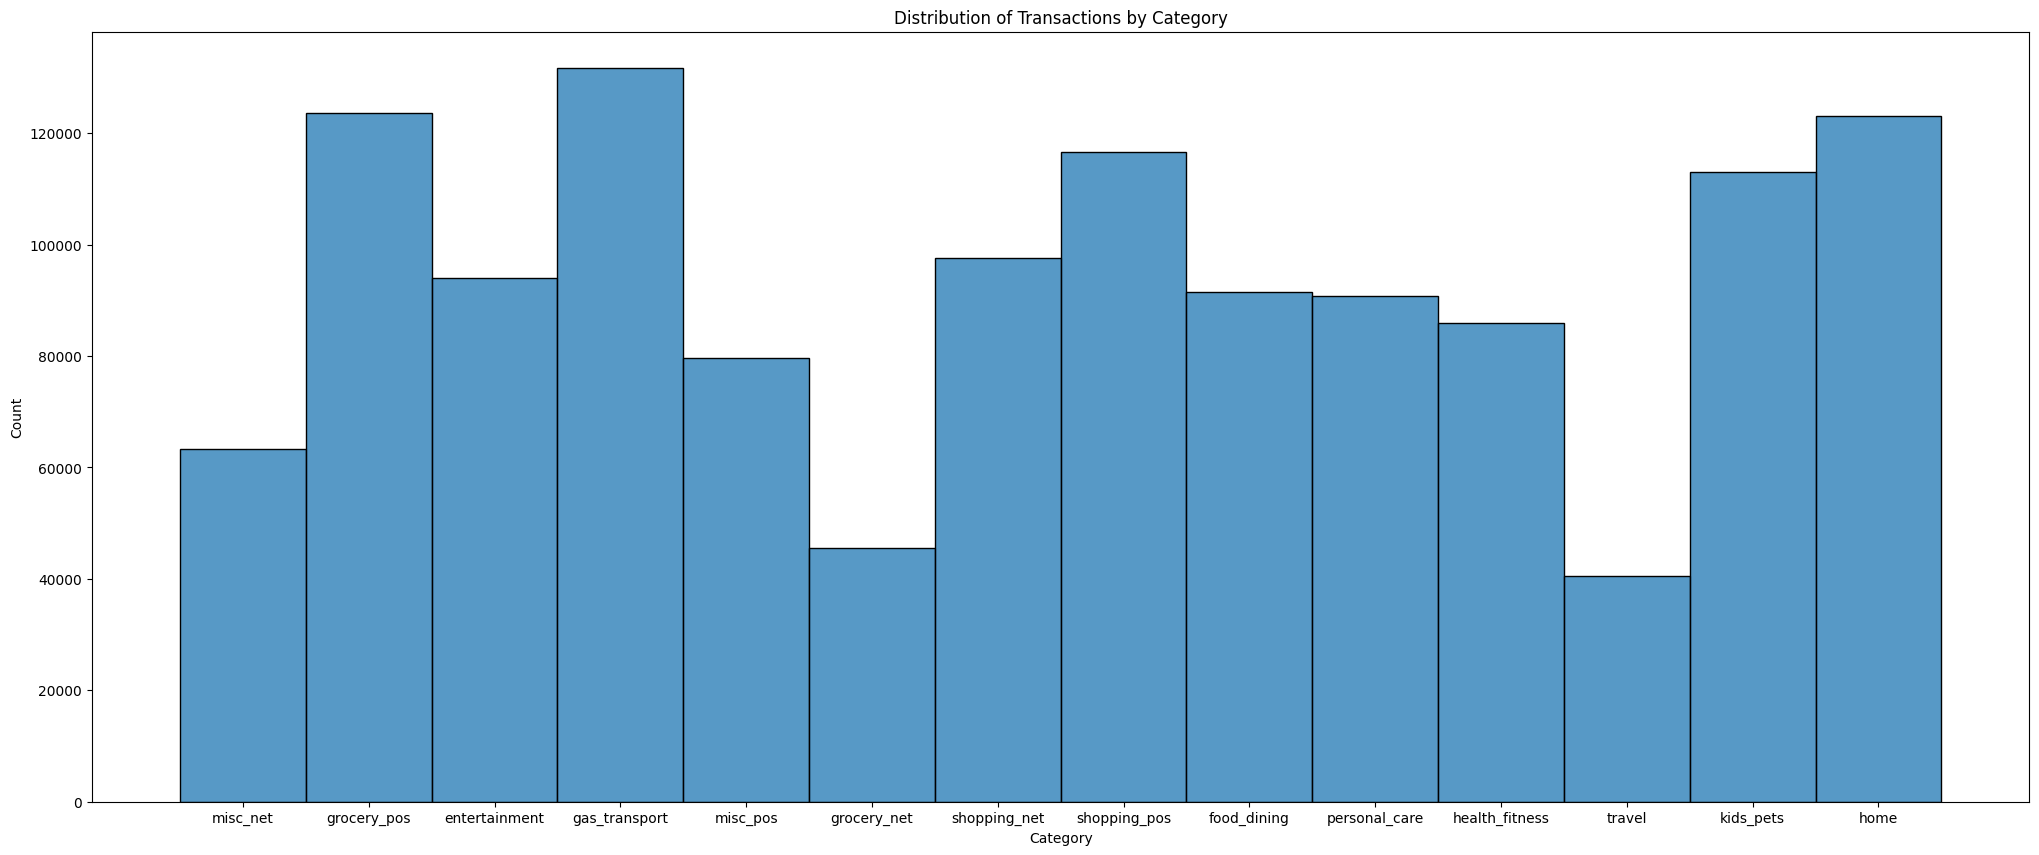

In [ ]:
# Visualisasi distribusi transaksi berdasarkan category
plt.figure(figsize=(25, 10))
sns.histplot(df_train['category'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Category')
plt.show()

Kategori dengan transaksi terbanyak ialah **gas_transport** dengan jumlah **131659** transaksi.

Sedangkan kategori dengan transaksi paling sedikit ialah **travel** dengan jumlah **40507** transaksi.

In [ ]:
# Filter data transaksi fraud
fraud_transactions = df_train[df_train['is_fraud'] == 1]

# Hitung jumlah transaksi fraud untuk setiap kategori
fraud_by_category = fraud_transactions['category'].value_counts().sort_index()

In [ ]:
fraud_by_category

category
entertainment      233
food_dining        151
gas_transport      618
grocery_net        134
grocery_pos       1743
health_fitness     133
home               198
kids_pets          239
misc_net           915
misc_pos           250
personal_care      220
shopping_net      1713
shopping_pos       843
travel             116
Name: count, dtype: int64

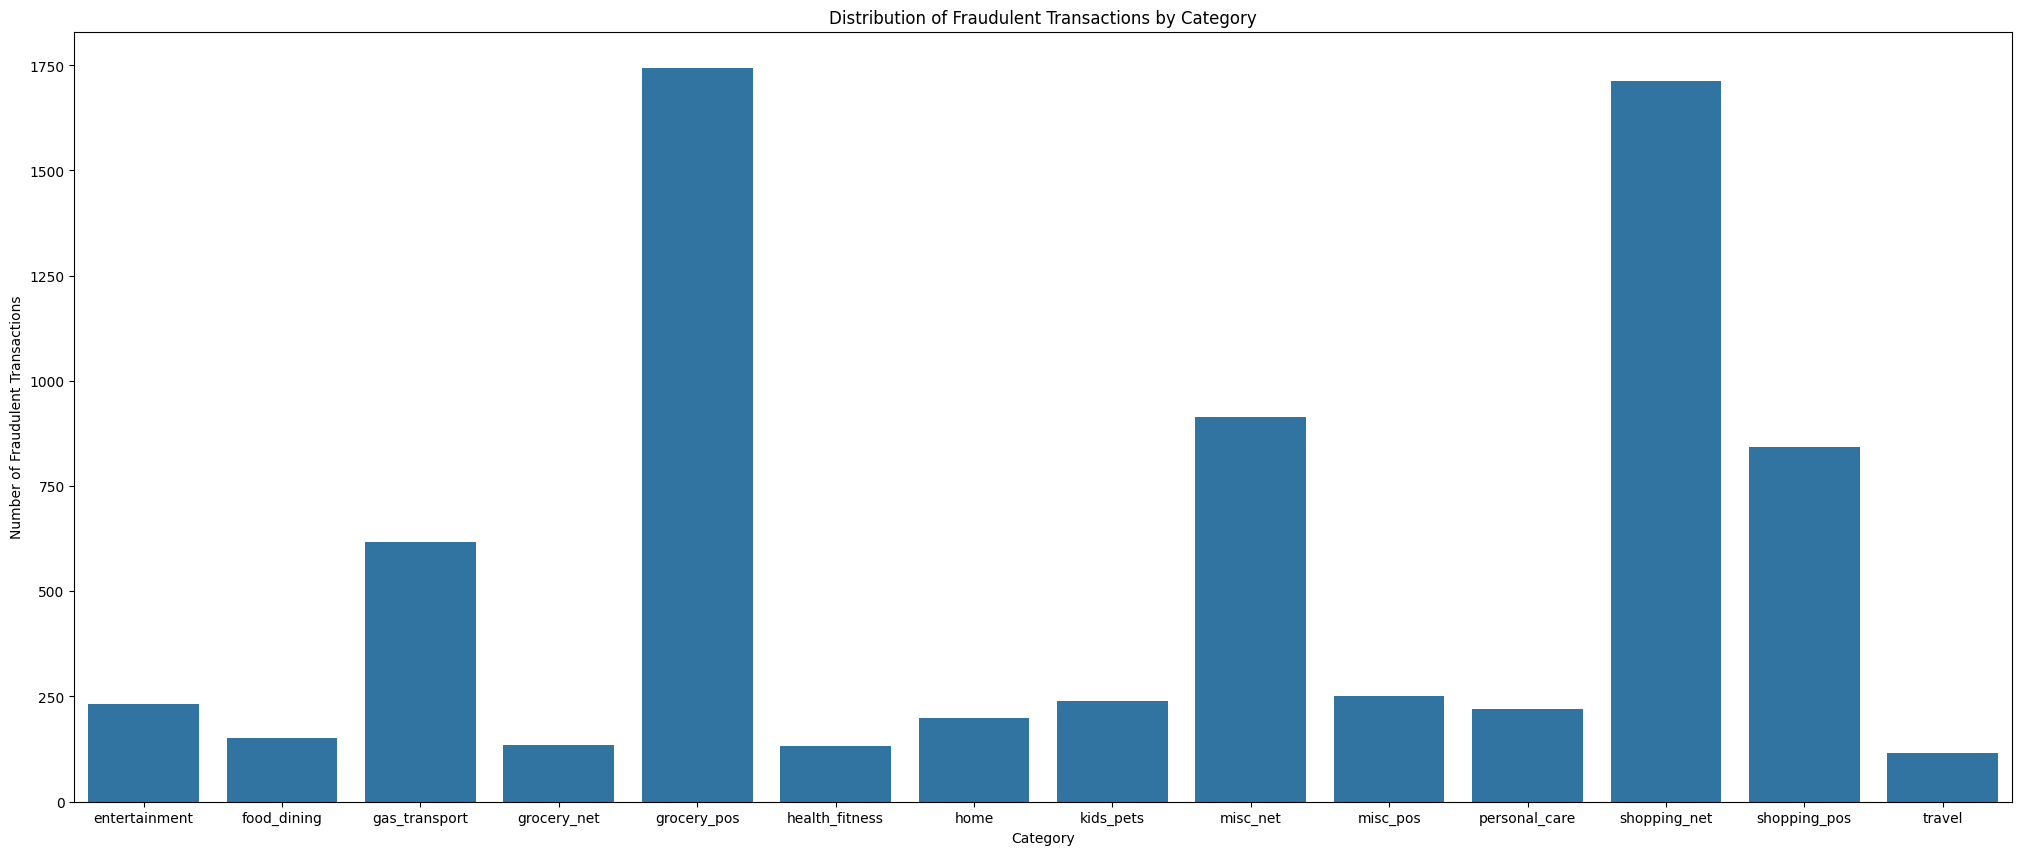

In [ ]:
# Visualisasi distribusi transaksi fraud berdasarkan kategori
plt.figure(figsize=(25, 10))
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values)
plt.xlabel('Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Category')
plt.show()

In [ ]:
def categorize_risk_by_category(category):
  if category in ['gas_transport', 'misc_net', 'shopping_pos']:
    return 2
  elif category in ['grocery_pos', 'shopping_net']:
    return 3
  else:
    return 1

df_train['risk_category_by_category'] = df_train['category'].apply(categorize_risk_by_category)
df_test['risk_category_by_category'] = df_test['category'].apply(categorize_risk_by_category)

In [ ]:
df_train['risk_category_by_category'].value_counts()

risk_category_by_category
1    763876
2    311618
3    221181
Name: count, dtype: int64

Dari visualisasi di atas, distribusi transaksi fraud berdasarkan category dapat dibagi menjadi 3.

Category dengan transaksi fraud tertinggi ialah **grocery_pos** dan **shopping_net** dengan 1700-an transaksi.

Category dengan transaksi fraud sedang ialah **gas_transport, misc_net, dan shopping_pos** dengan berkisar antara **618-915** transaksi.

Sisanya ialah category dengan transaksi fraud terendah dengan berkisar antara **116-250** transaksi.

# Eksplorasi Fitur amt

In [ ]:
df_train['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [ ]:
# Melihat apakah terdapat nilai 0 pada kolom amt
df_train['amt'][df_train['amt']==0].any()

False

In [ ]:
print(f'Transaksi Terkecil: $ {df_train["amt"].min()}')
print(f'Transaksi Terbesar: $ {df_train["amt"].max()}')
print(f'Rata-rata Transaksi: $ {df_train["amt"].mean()}')
print(f'Median Transaksi: $ {df_train["amt"].median()}')
print(f'Modus Transaksi: $ {df_train["amt"].mode()[0]}')

Transaksi Terkecil: $ 1.0
Transaksi Terbesar: $ 28948.9
Rata-rata Transaksi: $ 70.35103545607033
Median Transaksi: $ 47.52
Modus Transaksi: $ 1.14


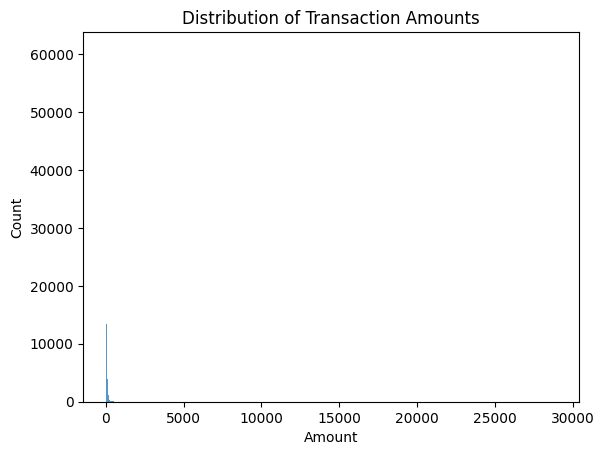

In [ ]:
# Visualisasi distribusi dari kolom amt
sns.histplot(df_train['amt'])
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Transaction Amounts')
plt.show()

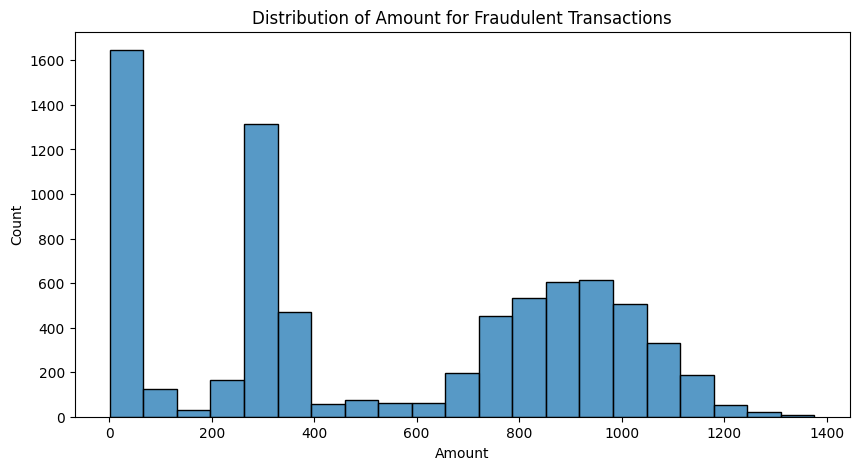

In [ ]:
# Menampilkan fraud berdasarkan amount

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(10, 5))
sns.histplot(df_fraud['amt'])
plt.title('Distribution of Amount for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

# Eksplorasi Kolom gender

In [ ]:
df_train['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

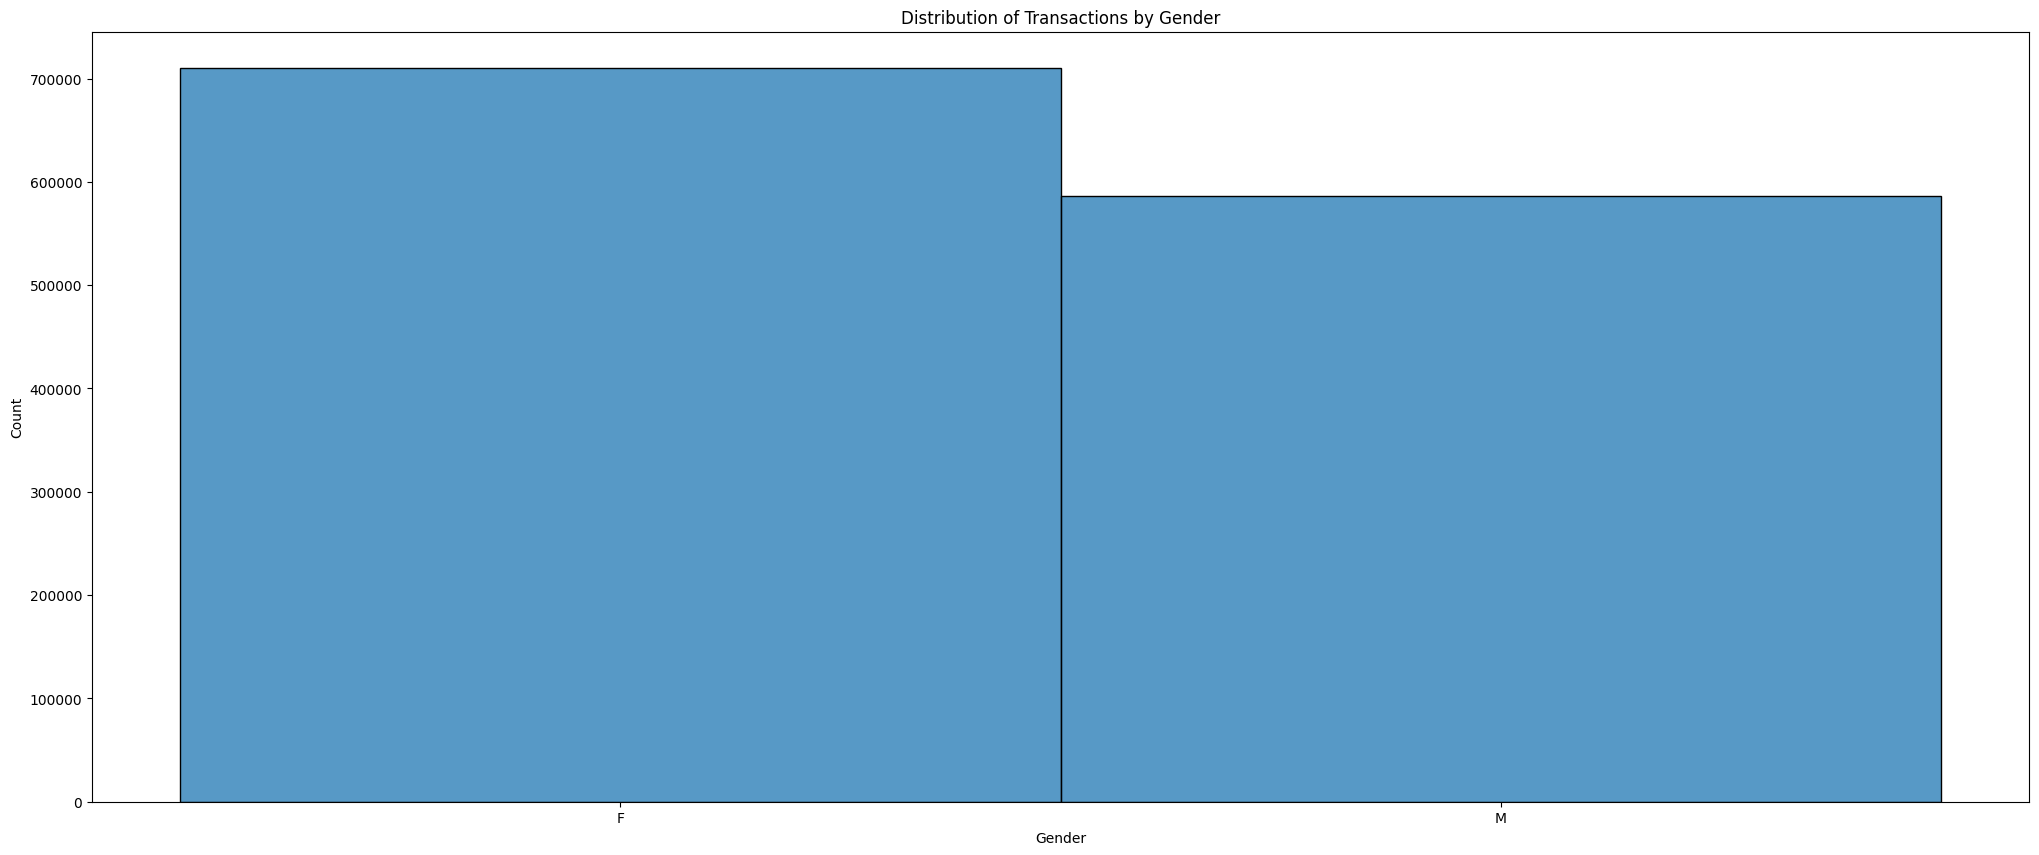

In [ ]:
# Visualisasi distribusi transaksi berdasarkan gender
plt.figure(figsize=(25, 10))
sns.histplot(df_train['gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Gender')
plt.show()

Transaksi lebih banyak dilakukan oleh **perempuan** daripada **laki-laki**

In [ ]:
# Hitung jumlah transaksi fraud untuk setiap gender
fraud_by_gender = fraud_transactions['gender'].value_counts().sort_index()

In [ ]:
fraud_by_gender

gender
F    3735
M    3771
Name: count, dtype: int64

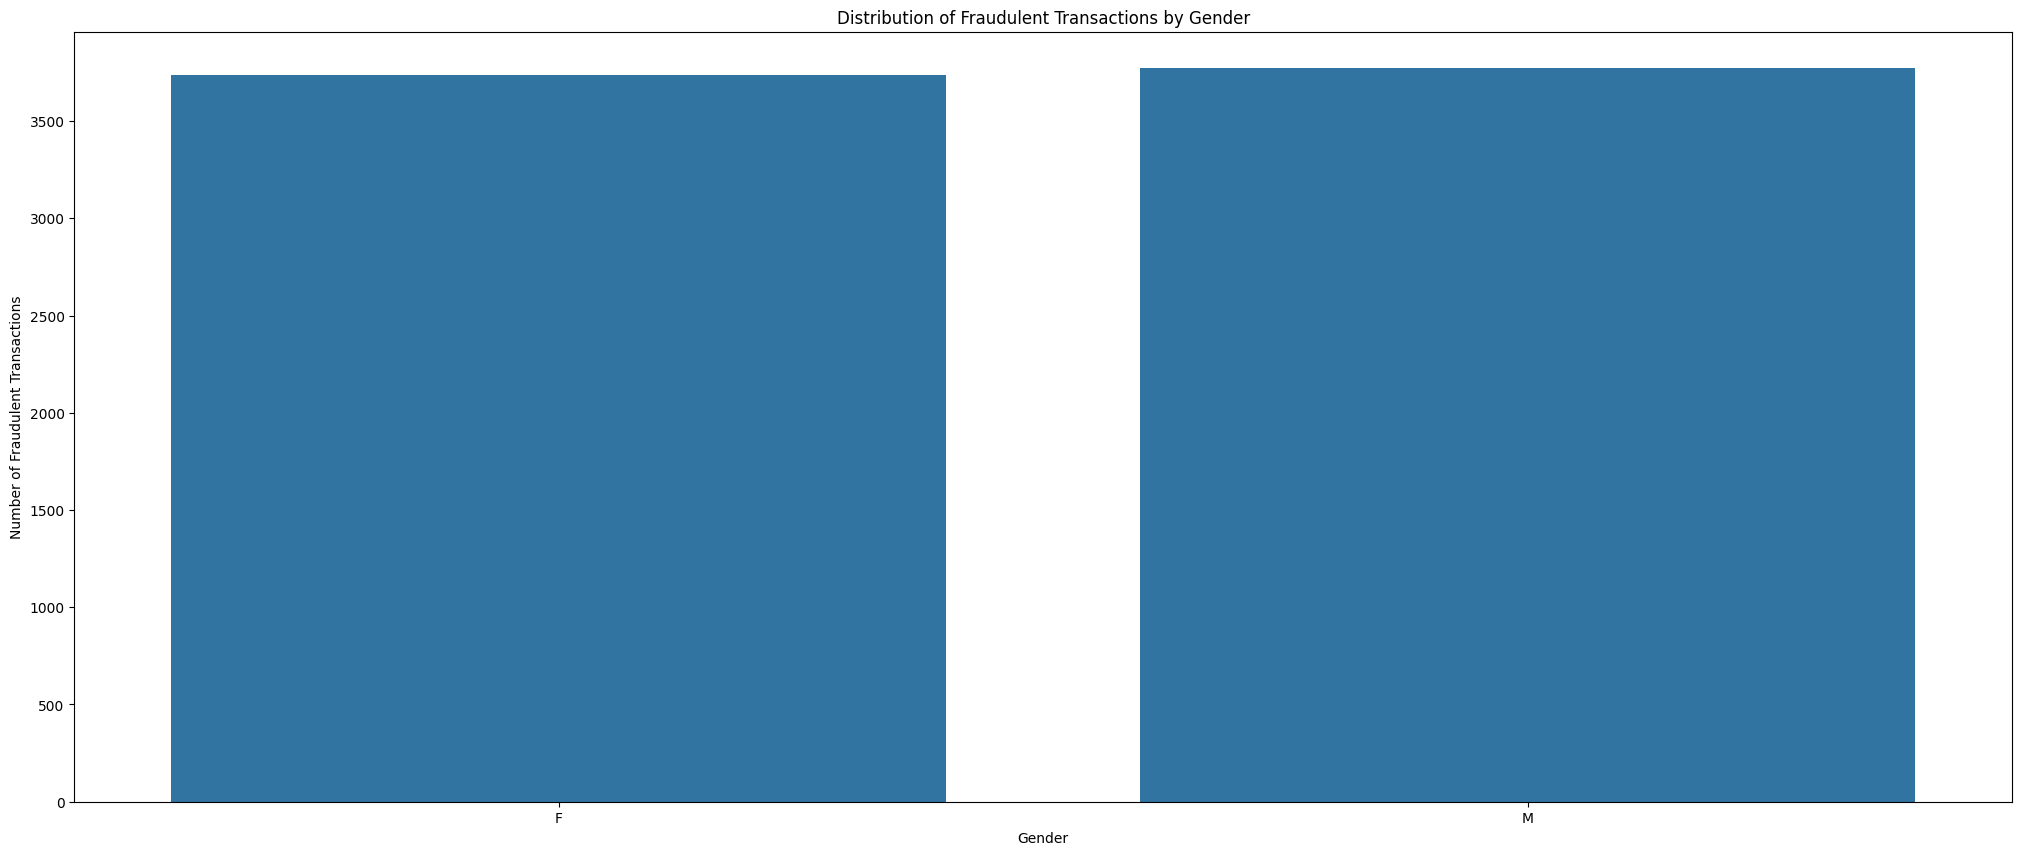

In [ ]:
# Visualisasi distribusi transaksi fraud berdasarkan kategori
plt.figure(figsize=(25, 10))
sns.barplot(x=fraud_by_gender.index, y=fraud_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Gender')
plt.show()

Perbandingan transaksi fraud berdasarkan gender **tidak berbeda jauh**, sehingga tidak ada informasi yang didapat dari kolom gender dan nantinya dapat di drop

# Eksplorasi Kolom city dan city_pop

In [ ]:
df_train['city'].nunique()

894

In [ ]:
df_train['city_pop'].value_counts()

city_pop
606        5496
1595797    5130
1312922    5075
1766       4574
241        4533
           ... 
99475         7
198659        7
4046          7
1888          7
3631          7
Name: count, Length: 879, dtype: int64

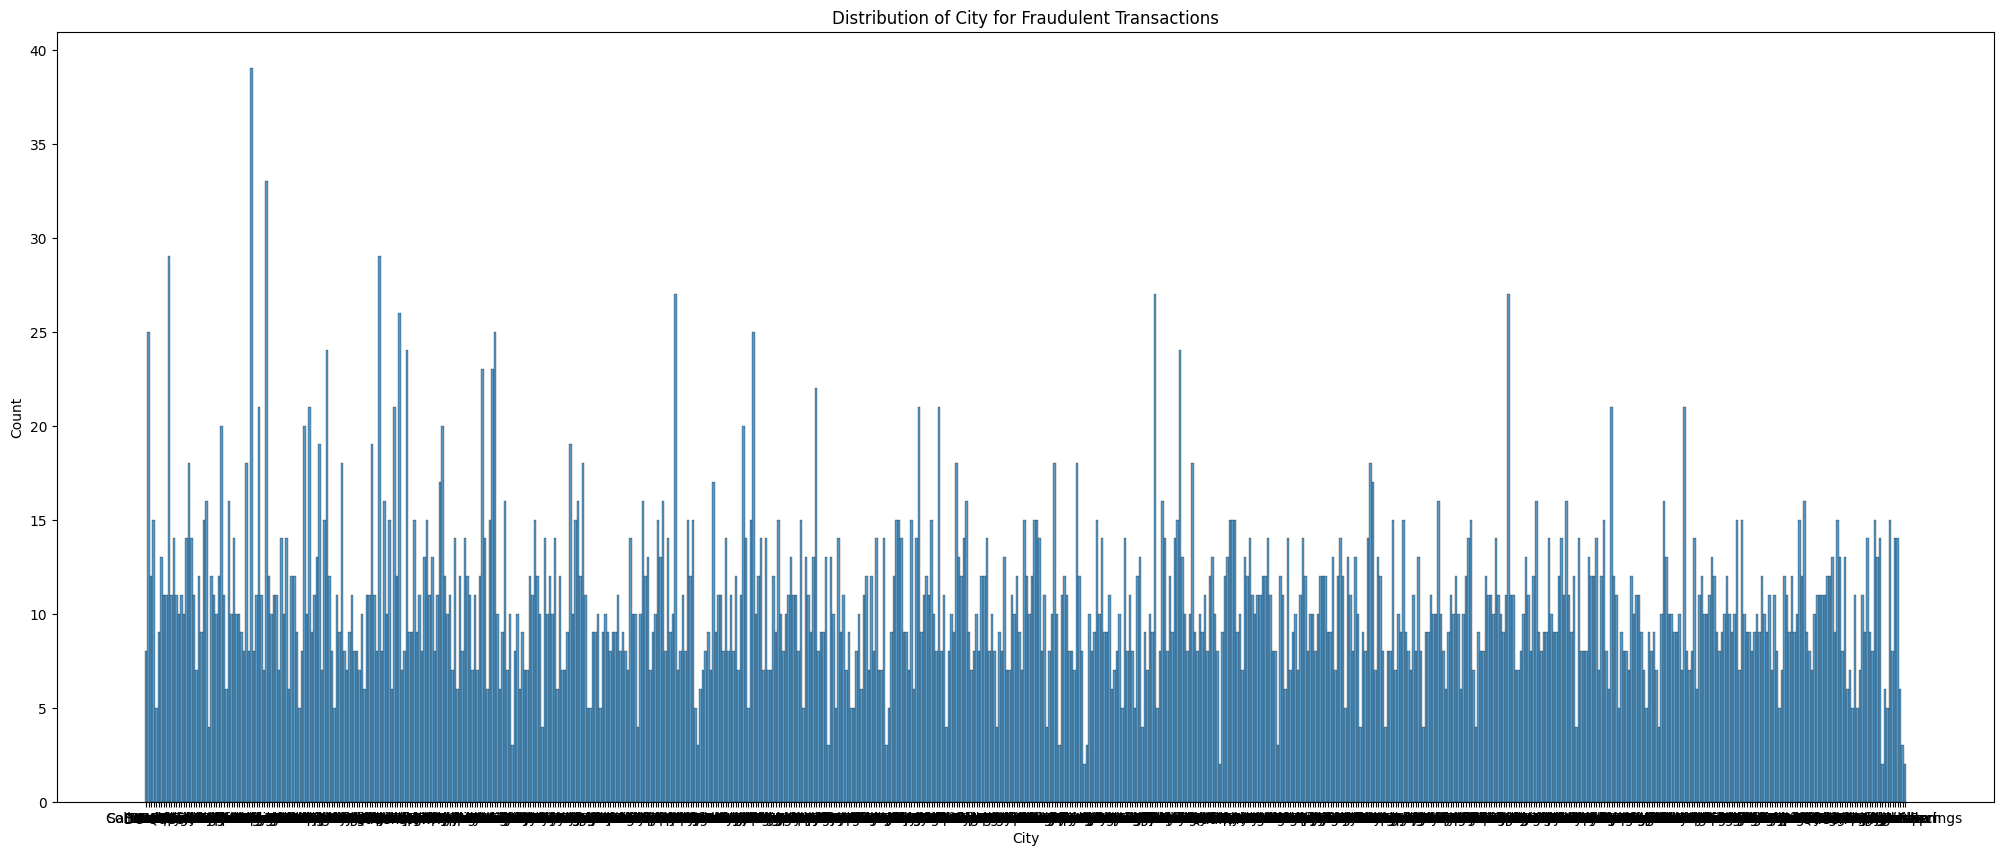

In [ ]:
# Menampilkan fraud berdasarkan city

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(25, 10))
sns.histplot(df_fraud['city'])
plt.title('Distribution of City for Fraudulent Transactions')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

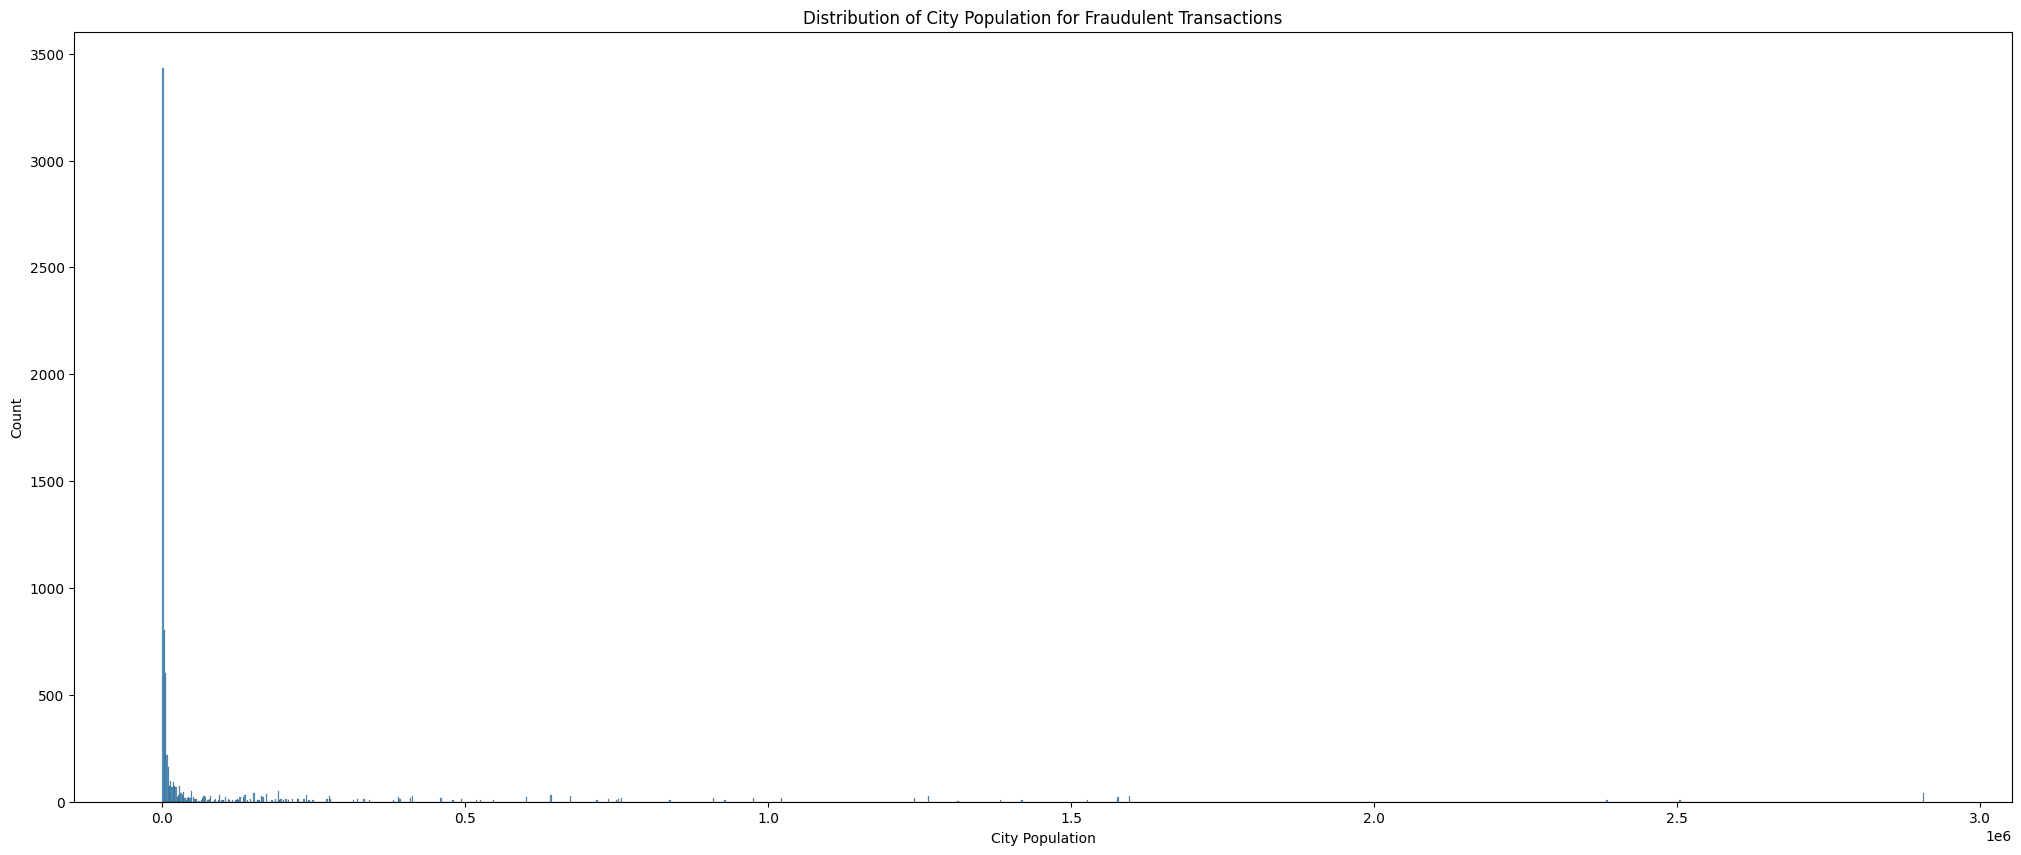

In [ ]:
# Menampilkan fraud berdasarkan city population

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(25, 10))
sns.histplot(df_fraud['city_pop'])
plt.title('Distribution of City Population for Fraudulent Transactions')
plt.xlabel('City Population')
plt.ylabel('Count')
plt.show()

Karena kotanya terlalu banyak, maka kami memutuskan untuk melakukan drop pada kolom city, yang berarti juga city_pop juga harus di drop nantinya

# Eksplorasi kolom lat, long, merch_lat, dan merch_long

lat dan long menginformasikan posisi dari credit card holder. merch_lat dan merch_long menginformasikan posisi dari merchant. Sehingga dari kedua informasi tersebut, kita dapat mencari jarak dari credit card holder dan merchant dan menjadikannya fitur baru.

In [ ]:
# Membuat perhitungan untuk menghitung jarak antara credit card holder dan merchant berdasarkan lat long dan merch_lat merch_long

def haversine_distance(origin, destination):
  """
  Calculate the great-circle distance between two points on Earth.

  Args:
    origin: A tuple of (latitude, longitude) for the origin point.
    destination: A tuple of (latitude, longitude) for the destination point.

  Returns:
    The distance between the two points in kilometers.
  """
  lat1, lon1 = origin
  lat2, lon2 = destination
  radius = 6371  # Earth's radius in kilometers

  dlat = np.radians(lat2 - lat1)
  dlon = np.radians(lon2 - lon1)

  a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
  distance = radius * c

  return distance

# Calculate the distance between the credit card holder and the merchant for each transaction
df_train['distance'] = haversine_distance((df_train['lat'], df_train['long']), (df_train['merch_lat'], df_train['merch_long']))
df_test['distance'] = haversine_distance((df_test['lat'], df_test['long']), (df_test['merch_lat'], df_test['merch_long']))

In [ ]:
df_train['distance'].describe()

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
max      1.521172e+02
Name: distance, dtype: float64

In [ ]:
df_train['distance'][df_train['distance']==0].any()

False

In [ ]:
print(f'Jarak Terdekat: {df_train["distance"].min()} km')
print(f'Jarak Terjauh: {df_train["distance"].max()} km')
print(f'Rata-rata Jarak: {df_train["distance"].mean()} km')
print(f'Median Jarak: {df_train["distance"].median()} km')
print(f'Modus Jarak: {df_train["distance"].mode()[0]} km')

Jarak Terdekat: 0.022254515638296814 km
Jarak Terjauh: 152.11717310594904 km
Rata-rata Jarak: 76.11465060395156 km
Median Jarak: 78.2317512923314 km
Modus Jarak: 0.022254515638296814 km


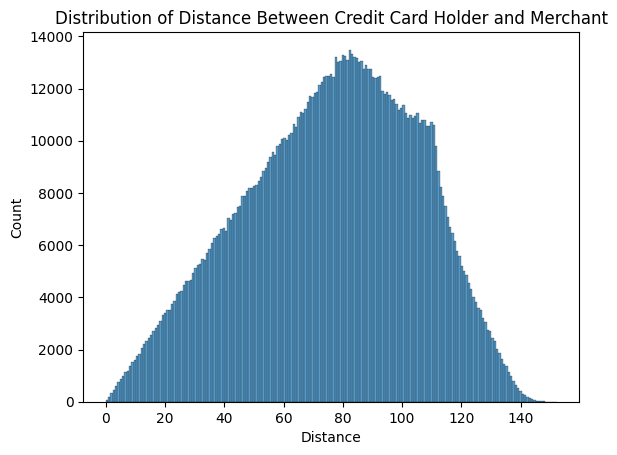

In [ ]:
# Visualisasi distribusi dari kolom distance
sns.histplot(df_train['distance'])
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Distribution of Distance Between Credit Card Holder and Merchant')
plt.show()

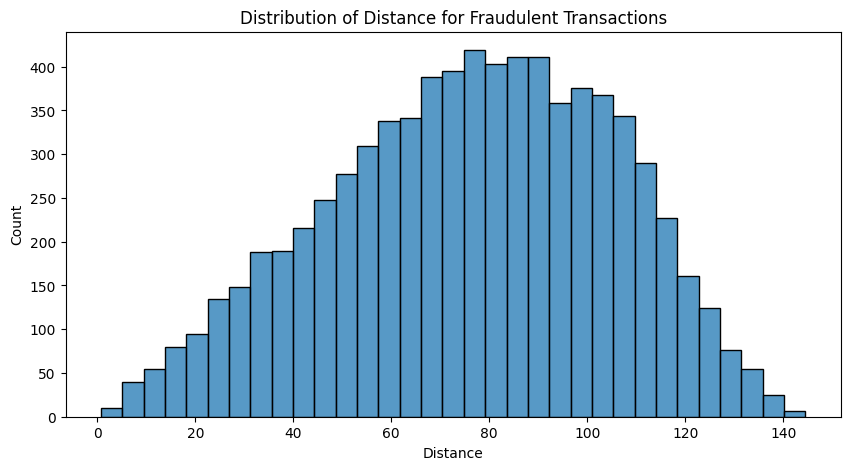

In [ ]:
# Menampilkan fraud berdasarkan distance

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(10, 5))
sns.histplot(df_fraud['distance'])
plt.title('Distribution of Distance for Fraudulent Transactions')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

# Eksplorasi Fitur job

In [ ]:
df_train['job'].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [ ]:
df_train['job'].nunique()

494

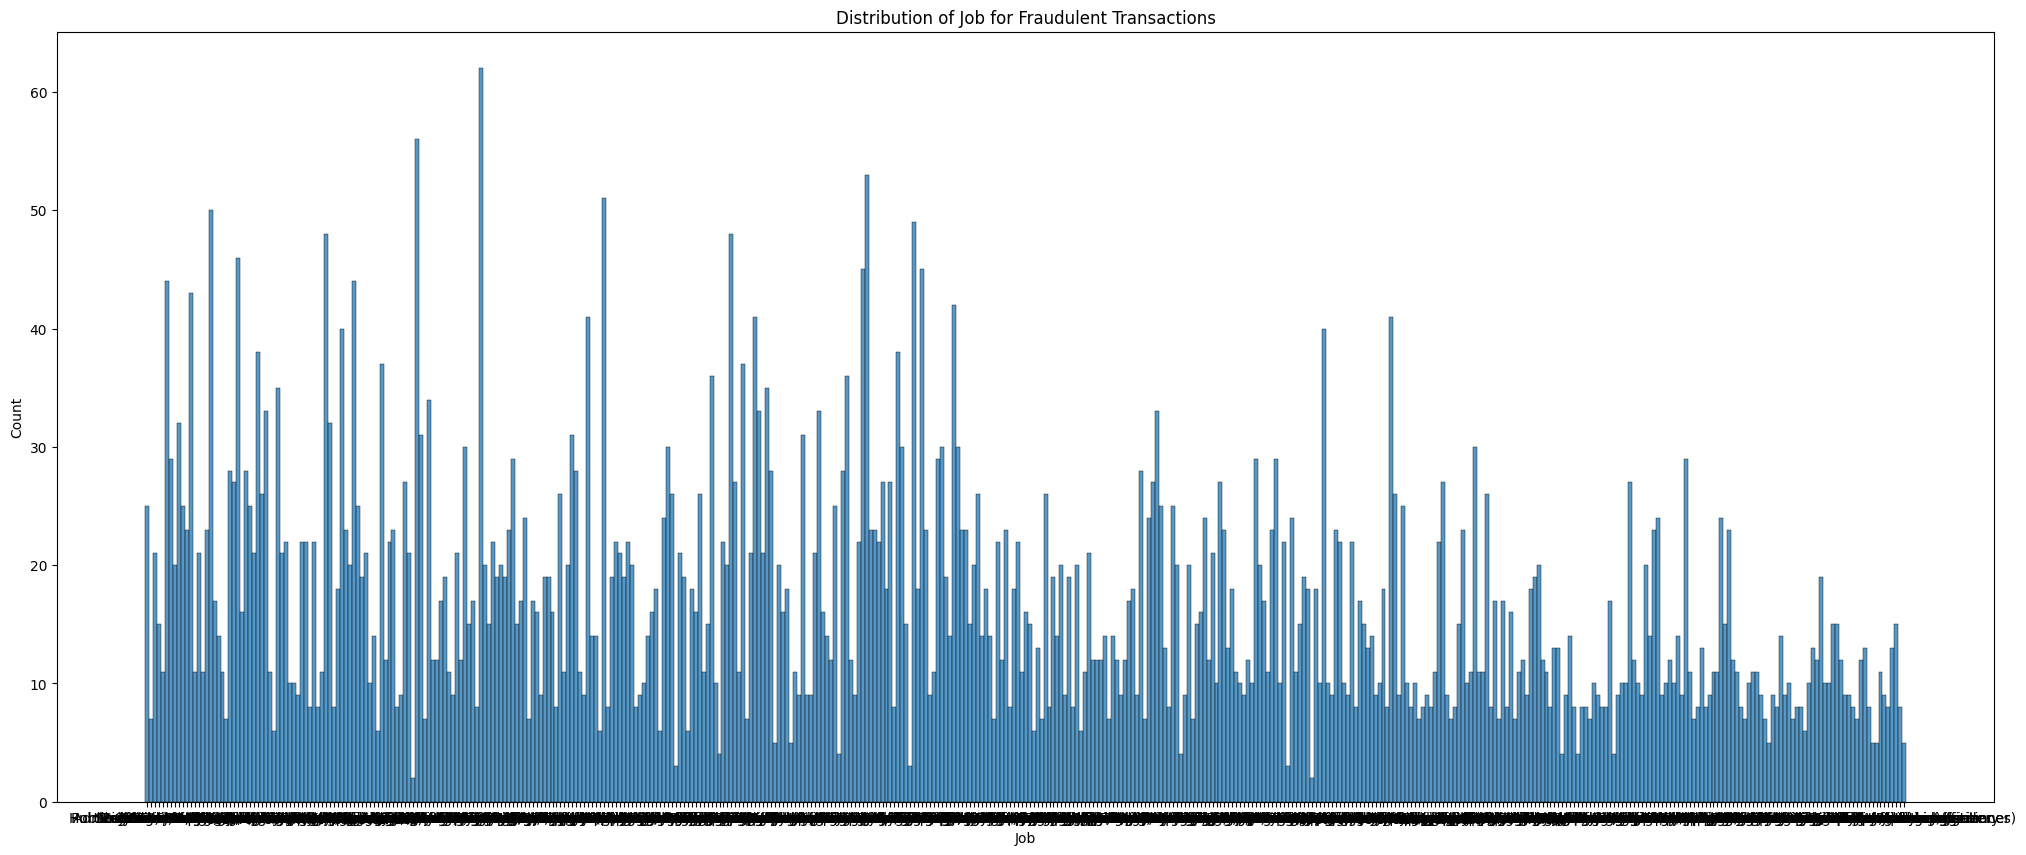

In [ ]:
# Menampilkan fraud berdasarkan job

df_fraud = df_train[df_train['is_fraud'] == 1]

plt.figure(figsize=(25, 10))
sns.histplot(df_fraud['job'])
plt.title('Distribution of Job for Fraudulent Transactions')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

Melihat distribusinya, saya memutuskan untuk melakukan drop saja terhadap fitur job.

# Eksplorasi Fitur dob

Karena distribusi dob terlalu banyak, maka saya akan menggantinya dengan kolom baru bernama age yang diambil dari perhitungan dob dengan trans_date_trans_time.

In [ ]:
# Membuat perhitungan umur berdasarkan kolom dob dan kolom trans_date_trans_time

df_train['age'] = df_train['trans_date_trans_time'].dt.year - df_train['dob'].dt.year
df_test['age'] = df_test['trans_date_trans_time'].dt.year - df_test['dob'].dt.year

In [ ]:
df_train['age'].describe()

count    1.296675e+06
mean     4.602930e+01
std      1.738237e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

In [ ]:
df_train['age'][df_train['age']==0].any()

False

In [ ]:
print(f'Umur Termuda: {df_train["age"].min()}')
print(f'Umur Tertua: {df_train["age"].max()}')
print(f'Rata-rata Umur: {df_train["age"].mean()}')
print(f'Median Umur: {df_train["age"].median()}')
print(f'Modus Umur: {df_train["age"].mode()[0]}')

Umur Termuda: 14
Umur Tertua: 96
Rata-rata Umur: 46.02929801222357
Median Umur: 44.0
Modus Umur: 47


In [ ]:
df_train['age'].nunique()

83

In [ ]:
df_fraud = df_train[df_train['is_fraud'] == 1]

In [ ]:
df_fraud['age'].nunique()

80

In [ ]:
df_fraud['age'].value_counts()

age
49    201
33    197
58    195
43    185
22    175
     ... 
93     16
15     16
75     12
68     11
14      7
Name: count, Length: 80, dtype: int64

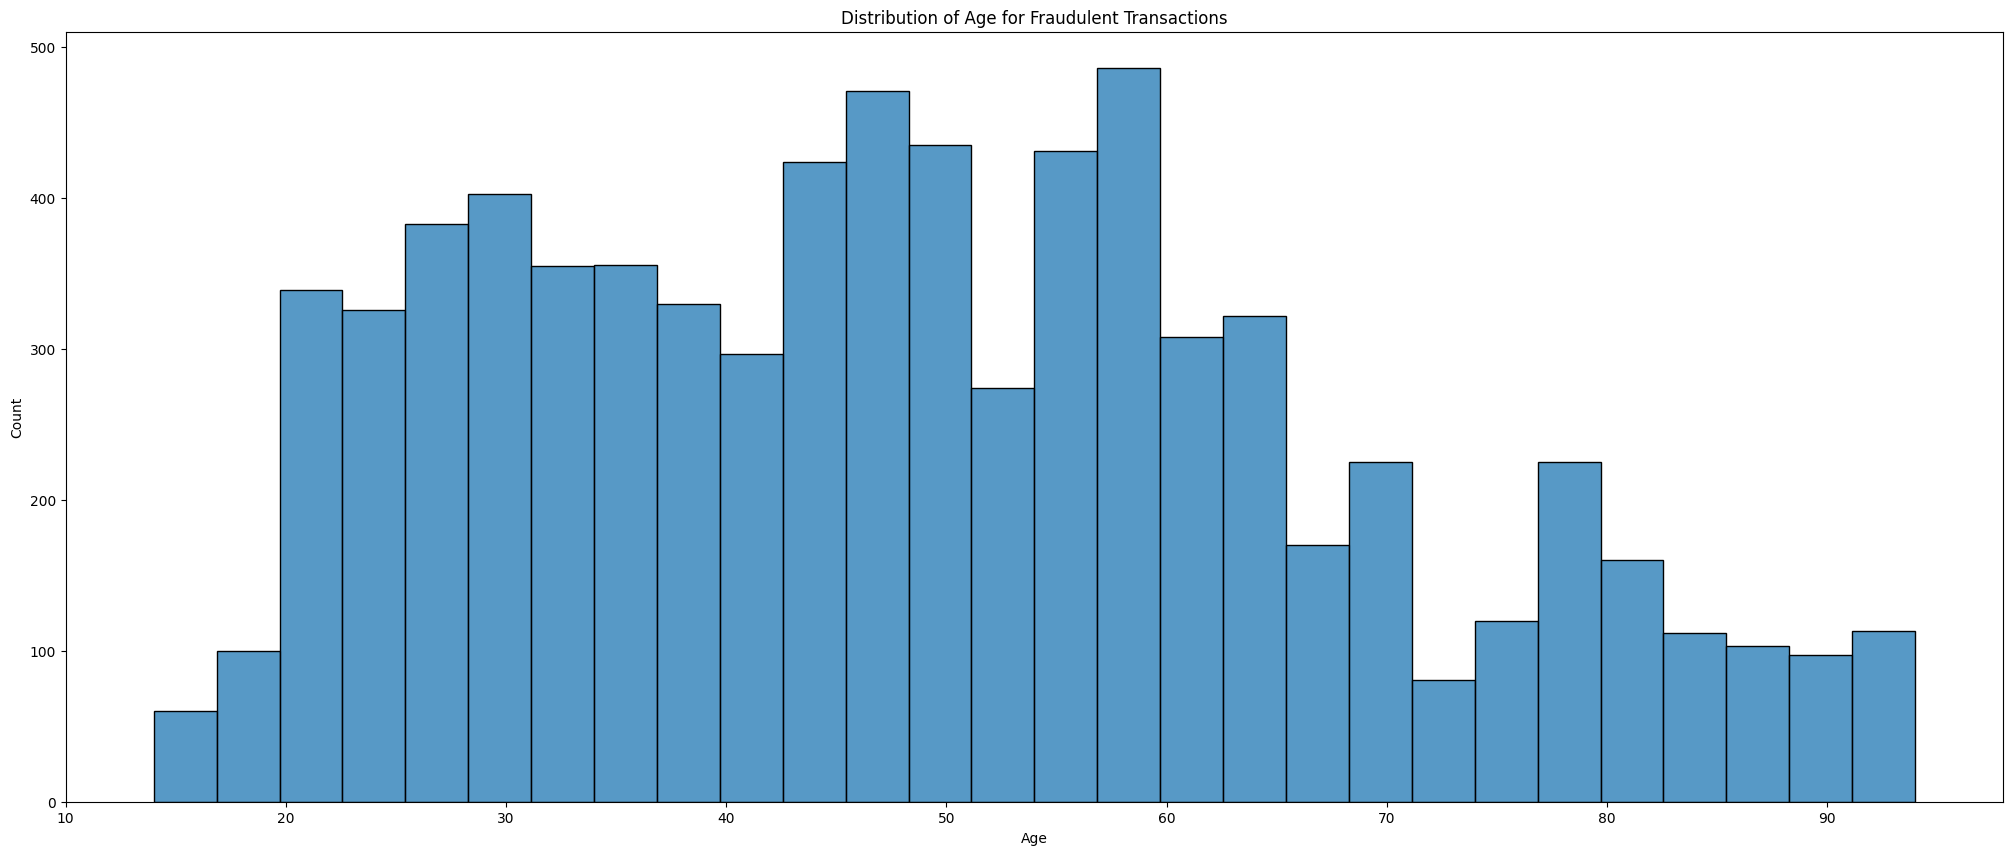

In [ ]:
# Menampilkan fraud berdasarkan age

plt.figure(figsize=(25, 10))
sns.histplot(df_fraud['age'])
plt.title('Distribution of Age for Fraudulent Transactions')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Melakukan Drop Fitur

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   trans_date_trans_time         1296675 non-null  datetime64[ns]
 1   cc_num                        1296675 non-null  int64         
 2   category                      1296675 non-null  object        
 3   amt                           1296675 non-null  float64       
 4   gender                        1296675 non-null  object        
 5   city                          1296675 non-null  object        
 6   lat                           1296675 non-null  float64       
 7   long                          1296675 non-null  float64       
 8   city_pop                      1296675 non-null  int64         
 9   job                           1296675 non-null  object        
 10  dob                           1296675 non-null  datetime64[ns]
 11

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   trans_date_trans_time         555719 non-null  datetime64[ns]
 1   cc_num                        555719 non-null  int64         
 2   category                      555719 non-null  object        
 3   amt                           555719 non-null  float64       
 4   gender                        555719 non-null  object        
 5   city                          555719 non-null  object        
 6   lat                           555719 non-null  float64       
 7   long                          555719 non-null  float64       
 8   city_pop                      555719 non-null  int64         
 9   job                           555719 non-null  object        
 10  dob                           555719 non-null  datetime64[ns]
 11  merch_lat    

In [ ]:
df_train.drop(columns=['trans_date_trans_time', 'cc_num', 'category', 'gender', 'city', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'hour', 'day_of_week'], axis=1, inplace=True)
df_test.drop(columns=['trans_date_trans_time', 'cc_num', 'category', 'gender', 'city', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'hour', 'day_of_week'], axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   amt                           1296675 non-null  float64
 1   is_fraud                      1296675 non-null  int64  
 2   risk_category_of_hour         1296675 non-null  int64  
 3   risk_category_by_day_of_week  1296675 non-null  int64  
 4   risk_category_by_category     1296675 non-null  int64  
 5   distance                      1296675 non-null  float64
 6   age                           1296675 non-null  int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 64.3 MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   amt                           555719 non-null  float64
 1   is_fraud                      555719 non-null  int64  
 2   risk_category_of_hour         555719 non-null  int64  
 3   risk_category_by_day_of_week  555719 non-null  int64  
 4   risk_category_by_category     555719 non-null  int64  
 5   distance                      555719 non-null  float64
 6   age                           555719 non-null  int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 27.6 MB


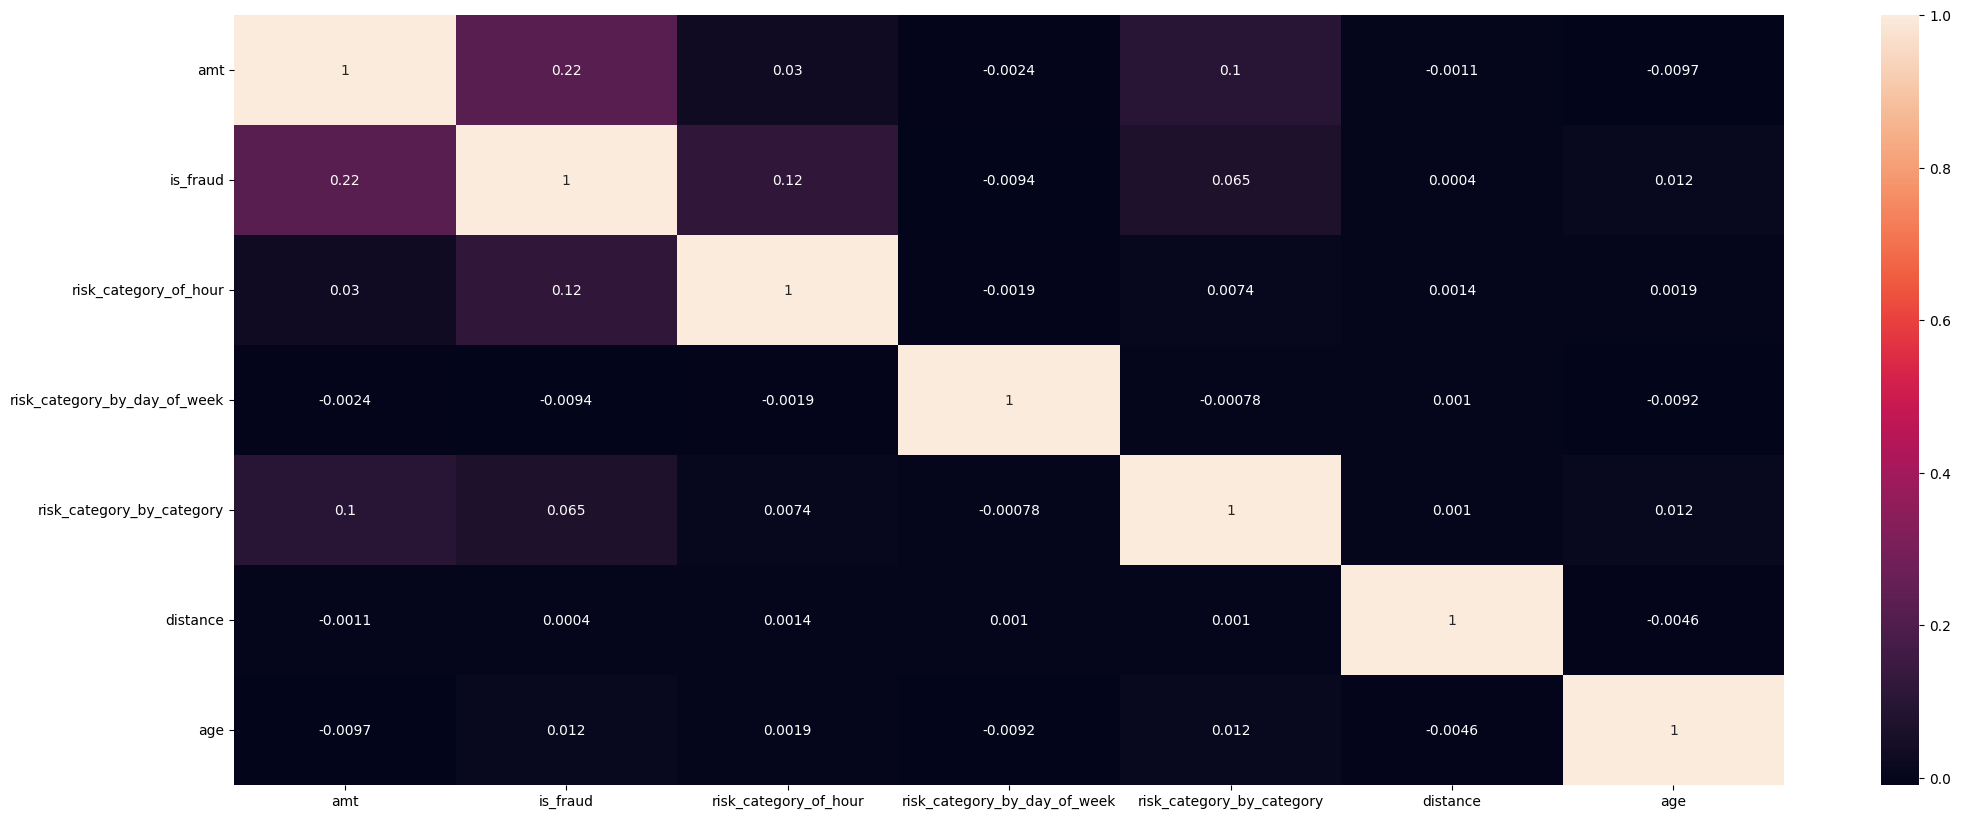

In [ ]:
corr = df_train.corr()
plt.subplots(figsize=(25, 10))
sns.heatmap(corr, annot=True)
plt.show()

# Modelling

In [ ]:
x = df_train.drop(columns=['is_fraud'], axis=1)
y = df_train['is_fraud']

In [ ]:
df_combined = pd.concat([df_train, df_test])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
logreg = LogisticRegression(C=0.1, class_weight='balanced', penalty='l1', solver='liblinear')
logreg.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [ ]:
pred_train = logreg.predict(x_train_scaled)
pred_test = logreg.predict(x_test_scaled)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_train, pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92    902418
           1       0.03      0.84      0.06      5254

    accuracy                           0.85    907672
   macro avg       0.52      0.85      0.49    907672
weighted avg       0.99      0.85      0.92    907672


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    386751
           1       0.03      0.84      0.06      2252

    accuracy                           0.86    389003
   macro avg       0.52      0.85      0.49    389003
weighted avg       0.99      0.86      0.92    389003



Accuracy Train: 0.8547316651830177
Precision Train: 0.032626993502658005
Recall Train: 0.8410734678340313
F1 Score Train: 0.06281717770480617

Accuracy Test: 0.8553841487083648
Precision Test: 0.03290202048159424
Recall Test: 0.844582593250444
F1 Score Test: 0.06333666333666334



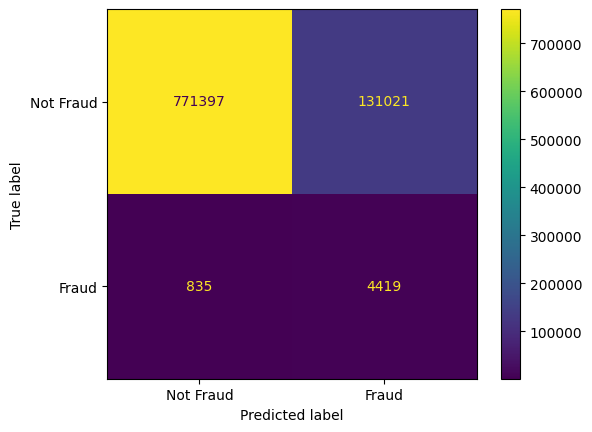

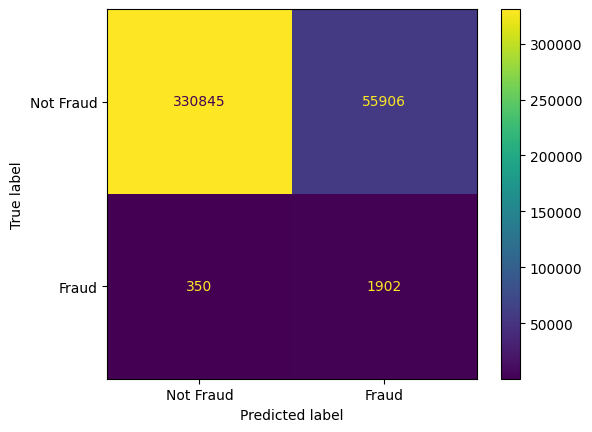

In [ ]:
print("Accuracy Train:", accuracy_score(y_train, pred_train))
print("Precision Train:", precision_score(y_train, pred_train))
print("Recall Train:", recall_score(y_train, pred_train))
print("F1 Score Train:", f1_score(y_train, pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, pred_test))
print("Precision Test:", precision_score(y_test, pred_test))
print("Recall Test:", recall_score(y_test, pred_test))
print("F1 Score Test:", f1_score(y_test, pred_test))

print()

cm_train = confusion_matrix(y_train, pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
ada_logreg = AdaBoostClassifier(base_estimator=logreg, n_estimators=100, learning_rate=0.01)
ada_logreg.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=LogisticRegression(C=0.1,
                                                     class_weight='balanced',
                                                     penalty='l1',
                                                     solver='liblinear'),
                   learning_rate=0.01, n_estimators=100)

In [ ]:
ada_logreg_pred_train = ada_logreg.predict(x_train_scaled)
ada_logreg_pred_test = ada_logreg.predict(x_test_scaled)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_train, ada_logreg_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, ada_logreg_pred_test))

Classification Report Train:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    902418
           1       0.00      0.00      0.00      5254

    accuracy                           0.99    907672
   macro avg       0.50      0.50      0.50    907672
weighted avg       0.99      0.99      0.99    907672


Classification Report Test:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Train: 0.994211565411294


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Train: 0.0
Recall Train: 0.0
F1 Score Train: 0.0

Accuracy Test: 0.9942108415616332


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Test: 0.0
Recall Test: 0.0
F1 Score Test: 0.0



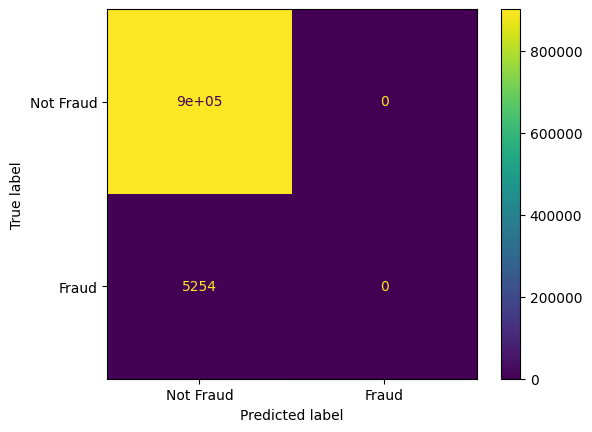

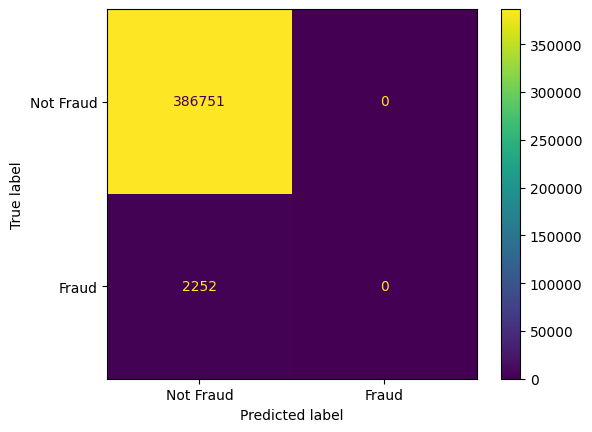

In [ ]:
print("Accuracy Train:", accuracy_score(y_train, ada_logreg_pred_train))
print("Precision Train:", precision_score(y_train, ada_logreg_pred_train))
print("Recall Train:", recall_score(y_train, ada_logreg_pred_train))
print("F1 Score Train:", f1_score(y_train, ada_logreg_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, ada_logreg_pred_test))
print("Precision Test:", precision_score(y_test, ada_logreg_pred_test))
print("Recall Test:", recall_score(y_test, ada_logreg_pred_test))
print("F1 Score Test:", f1_score(y_test, ada_logreg_pred_test))

print()

cm_train = confusion_matrix(y_train, ada_logreg_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, ada_logreg_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:
ada_pred_train = ada.predict(x_train)
ada_pred_test = ada.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_train, ada_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, ada_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    902418
           1       0.76      0.37      0.50      5254

    accuracy                           1.00    907672
   macro avg       0.88      0.68      0.75    907672
weighted avg       0.99      1.00      0.99    907672


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.76      0.36      0.49      2252

    accuracy                           1.00    389003
   macro avg       0.88      0.68      0.74    389003
weighted avg       0.99      1.00      0.99    389003



Accuracy Train: 0.9956779541508386
Precision Train: 0.762317698068585
Recall Train: 0.3681004948610582
F1 Score Train: 0.4964702862276987

Accuracy Test: 0.9956272830800791
Precision Test: 0.7591721542803387
Recall Test: 0.358348134991119
F1 Score Test: 0.4868778280542987



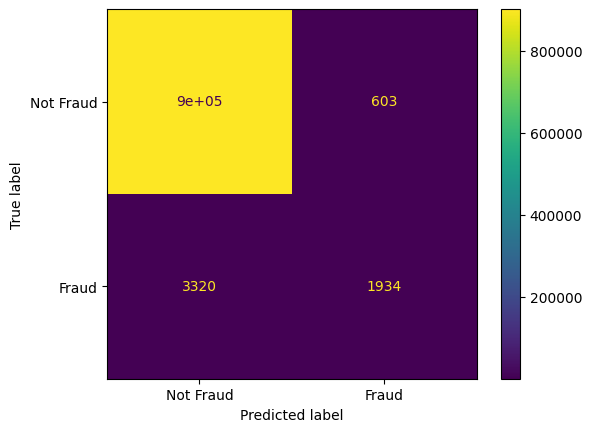

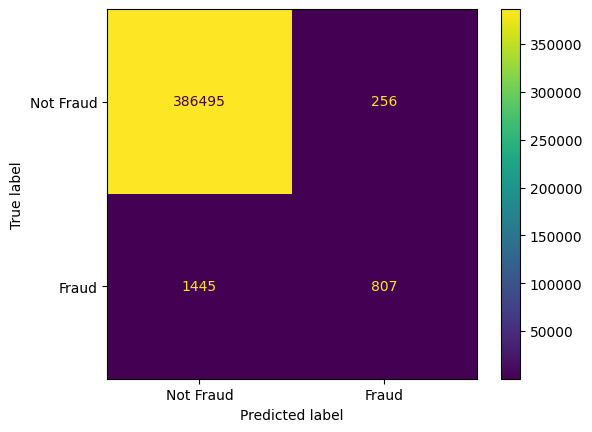

In [ ]:
print("Accuracy Train:", accuracy_score(y_train, ada_pred_train))
print("Precision Train:", precision_score(y_train, ada_pred_train))
print("Recall Train:", recall_score(y_train, ada_pred_train))
print("F1 Score Train:", f1_score(y_train, ada_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, ada_pred_test))
print("Precision Test:", precision_score(y_test, ada_pred_test))
print("Recall Test:", recall_score(y_test, ada_pred_test))
print("F1 Score Test:", f1_score(y_test, ada_pred_test))

print()

cm_train = confusion_matrix(y_train, ada_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, ada_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')

# Train the model on the training data
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [ ]:
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

In [ ]:
print("Classification Report Train:")
print(classification_report(y_train, rf_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, rf_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    902418
           1       0.13      0.95      0.23      5254

    accuracy                           0.96    907672
   macro avg       0.57      0.96      0.61    907672
weighted avg       0.99      0.96      0.98    907672


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    386751
           1       0.13      0.92      0.22      2252

    accuracy                           0.96    389003
   macro avg       0.56      0.94      0.60    389003
weighted avg       0.99      0.96      0.98    389003



Accuracy Train: 0.9628775592945469
Precision Train: 0.13039636127355425
Recall Train: 0.9548915112295394
F1 Score Train: 0.2294587116101443

Accuracy Test: 0.9627406472443657
Precision Test: 0.1260843005497862
Recall Test: 0.91651865008881
F1 Score Test: 0.2216732896573945



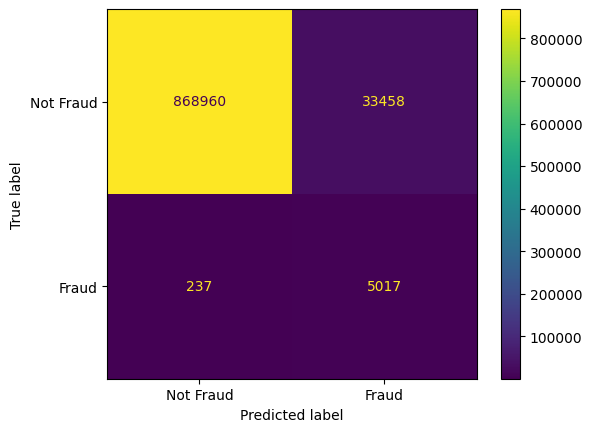

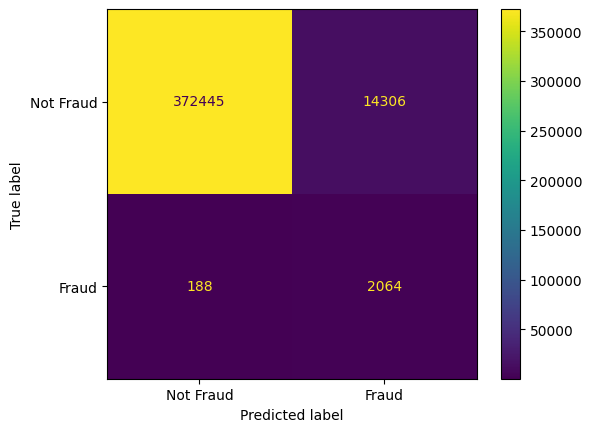

In [ ]:
print("Accuracy Train:", accuracy_score(y_train, rf_pred_train))
print("Precision Train:", precision_score(y_train, rf_pred_train))
print("Recall Train:", recall_score(y_train, rf_pred_train))
print("F1 Score Train:", f1_score(y_train, rf_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, rf_pred_test))
print("Precision Test:", precision_score(y_test, rf_pred_test))
print("Recall Test:", recall_score(y_test, rf_pred_test))
print("F1 Score Test:", f1_score(y_test, rf_pred_test))

print()

cm_train = confusion_matrix(y_train, rf_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, rf_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [ ]:
ada_rf = AdaBoostClassifier(base_estimator=rf, n_estimators=100, learning_rate=0.01)
ada_rf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         max_depth=10),
                   learning_rate=0.01, n_estimators=100)

In [107]:
ada_rf_pred_train = ada_rf.predict(x_train)
ada_rf_pred_test = ada_rf.predict(x_test)

In [108]:
print("Classification Report Train:")
print(classification_report(y_train, ada_rf_pred_train))
print()
print("Classification Report Test:")
print(classification_report(y_test, ada_rf_pred_test))

Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    902418
           1       0.13      0.96      0.23      5254

    accuracy                           0.96    907672
   macro avg       0.57      0.96      0.61    907672
weighted avg       0.99      0.96      0.98    907672


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    386751
           1       0.13      0.92      0.22      2252

    accuracy                           0.96    389003
   macro avg       0.56      0.94      0.60    389003
weighted avg       0.99      0.96      0.98    389003



Accuracy Train: 0.9630857842921231
Precision Train: 0.13119419351469896
Recall Train: 0.9564141606395128
F1 Score Train: 0.23073744145467903

Accuracy Test: 0.9629180237684543
Precision Test: 0.12693840024517317
Recall Test: 0.9196269982238011
F1 Score Test: 0.22308396617654982



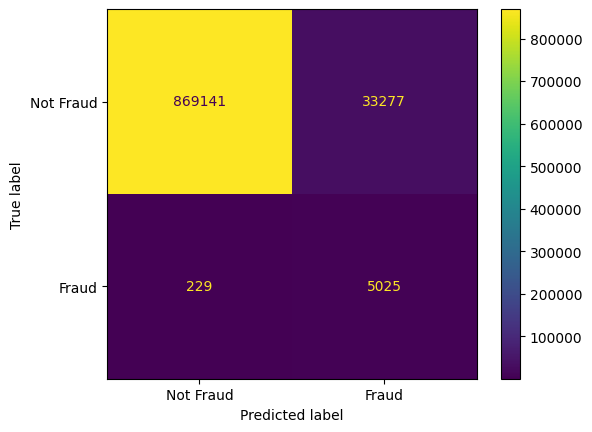

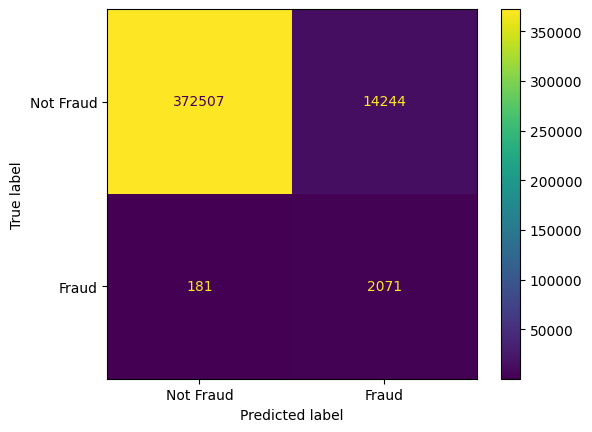

In [109]:
print("Accuracy Train:", accuracy_score(y_train, ada_rf_pred_train))
print("Precision Train:", precision_score(y_train, ada_rf_pred_train))
print("Recall Train:", recall_score(y_train, ada_rf_pred_train))
print("F1 Score Train:", f1_score(y_train, ada_rf_pred_train))

print()

print("Accuracy Test:", accuracy_score(y_test, ada_rf_pred_test))
print("Precision Test:", precision_score(y_test, ada_rf_pred_test))
print("Recall Test:", recall_score(y_test, ada_rf_pred_test))
print("F1 Score Test:", f1_score(y_test, ada_rf_pred_test))

print()

cm_train = confusion_matrix(y_train, ada_rf_pred_train, labels=[0, 1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Fraud', 'Fraud'])
disp_train.plot()
plt.show()

cm_test = confusion_matrix(y_test, ada_rf_pred_test, labels=[0, 1])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Fraud', 'Fraud'])
disp_test.plot()
plt.show()

In [110]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1.0, class_weight='balanced')
svc.fit(x_train, y_train)